# Libia to Fiftyone conversion

This notebook will make use of libia's data object and convert it to fiftyone

.. nbinfo::
    If you are looking at the documentation website, every time you see a `fo.launch_app`, you might see a either a lowres still image or a broken iframe, it's the fiftyone app client that is not working since the server no longer running. To see them working, you will have to run the notebook yourself.

In [1]:
from libia.dataset import from_coco, from_coco_keypoints, Dataset
import fiftyone as fo

## Load a bounding boxes dataset in test folders.

In [2]:
COCO_dataset = from_coco(
    "../../test_libia/test_data/coco_dataset/annotations_train.json",
    images_root="../../test_libia/test_data/coco_dataset/data/Images/",
)
COCO_dataset.check()

Checking Image and annotations Ids ...
Checking Bounding boxes ..
Checking label map ...
Checking images are valid ...


  0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
COCO_dataset

Converting the dataset to fiftyone and launching the app

In [7]:
dataset = COCO_dataset.to_fiftyone(dataset_name="detection_example", existing="erase")

  0%|          | 0/2 [00:00<?, ?it/s]

 100% |█████████████████████| 2/2 [29.1ms elapsed, 0s remaining, 68.8 samples/s]     


## Launching from a local notebook

This is the simplest command. there's a dedicated interface for notebook. See the [corresponding tutorial](https://docs.voxel51.com/environments/index.html#notebooks)


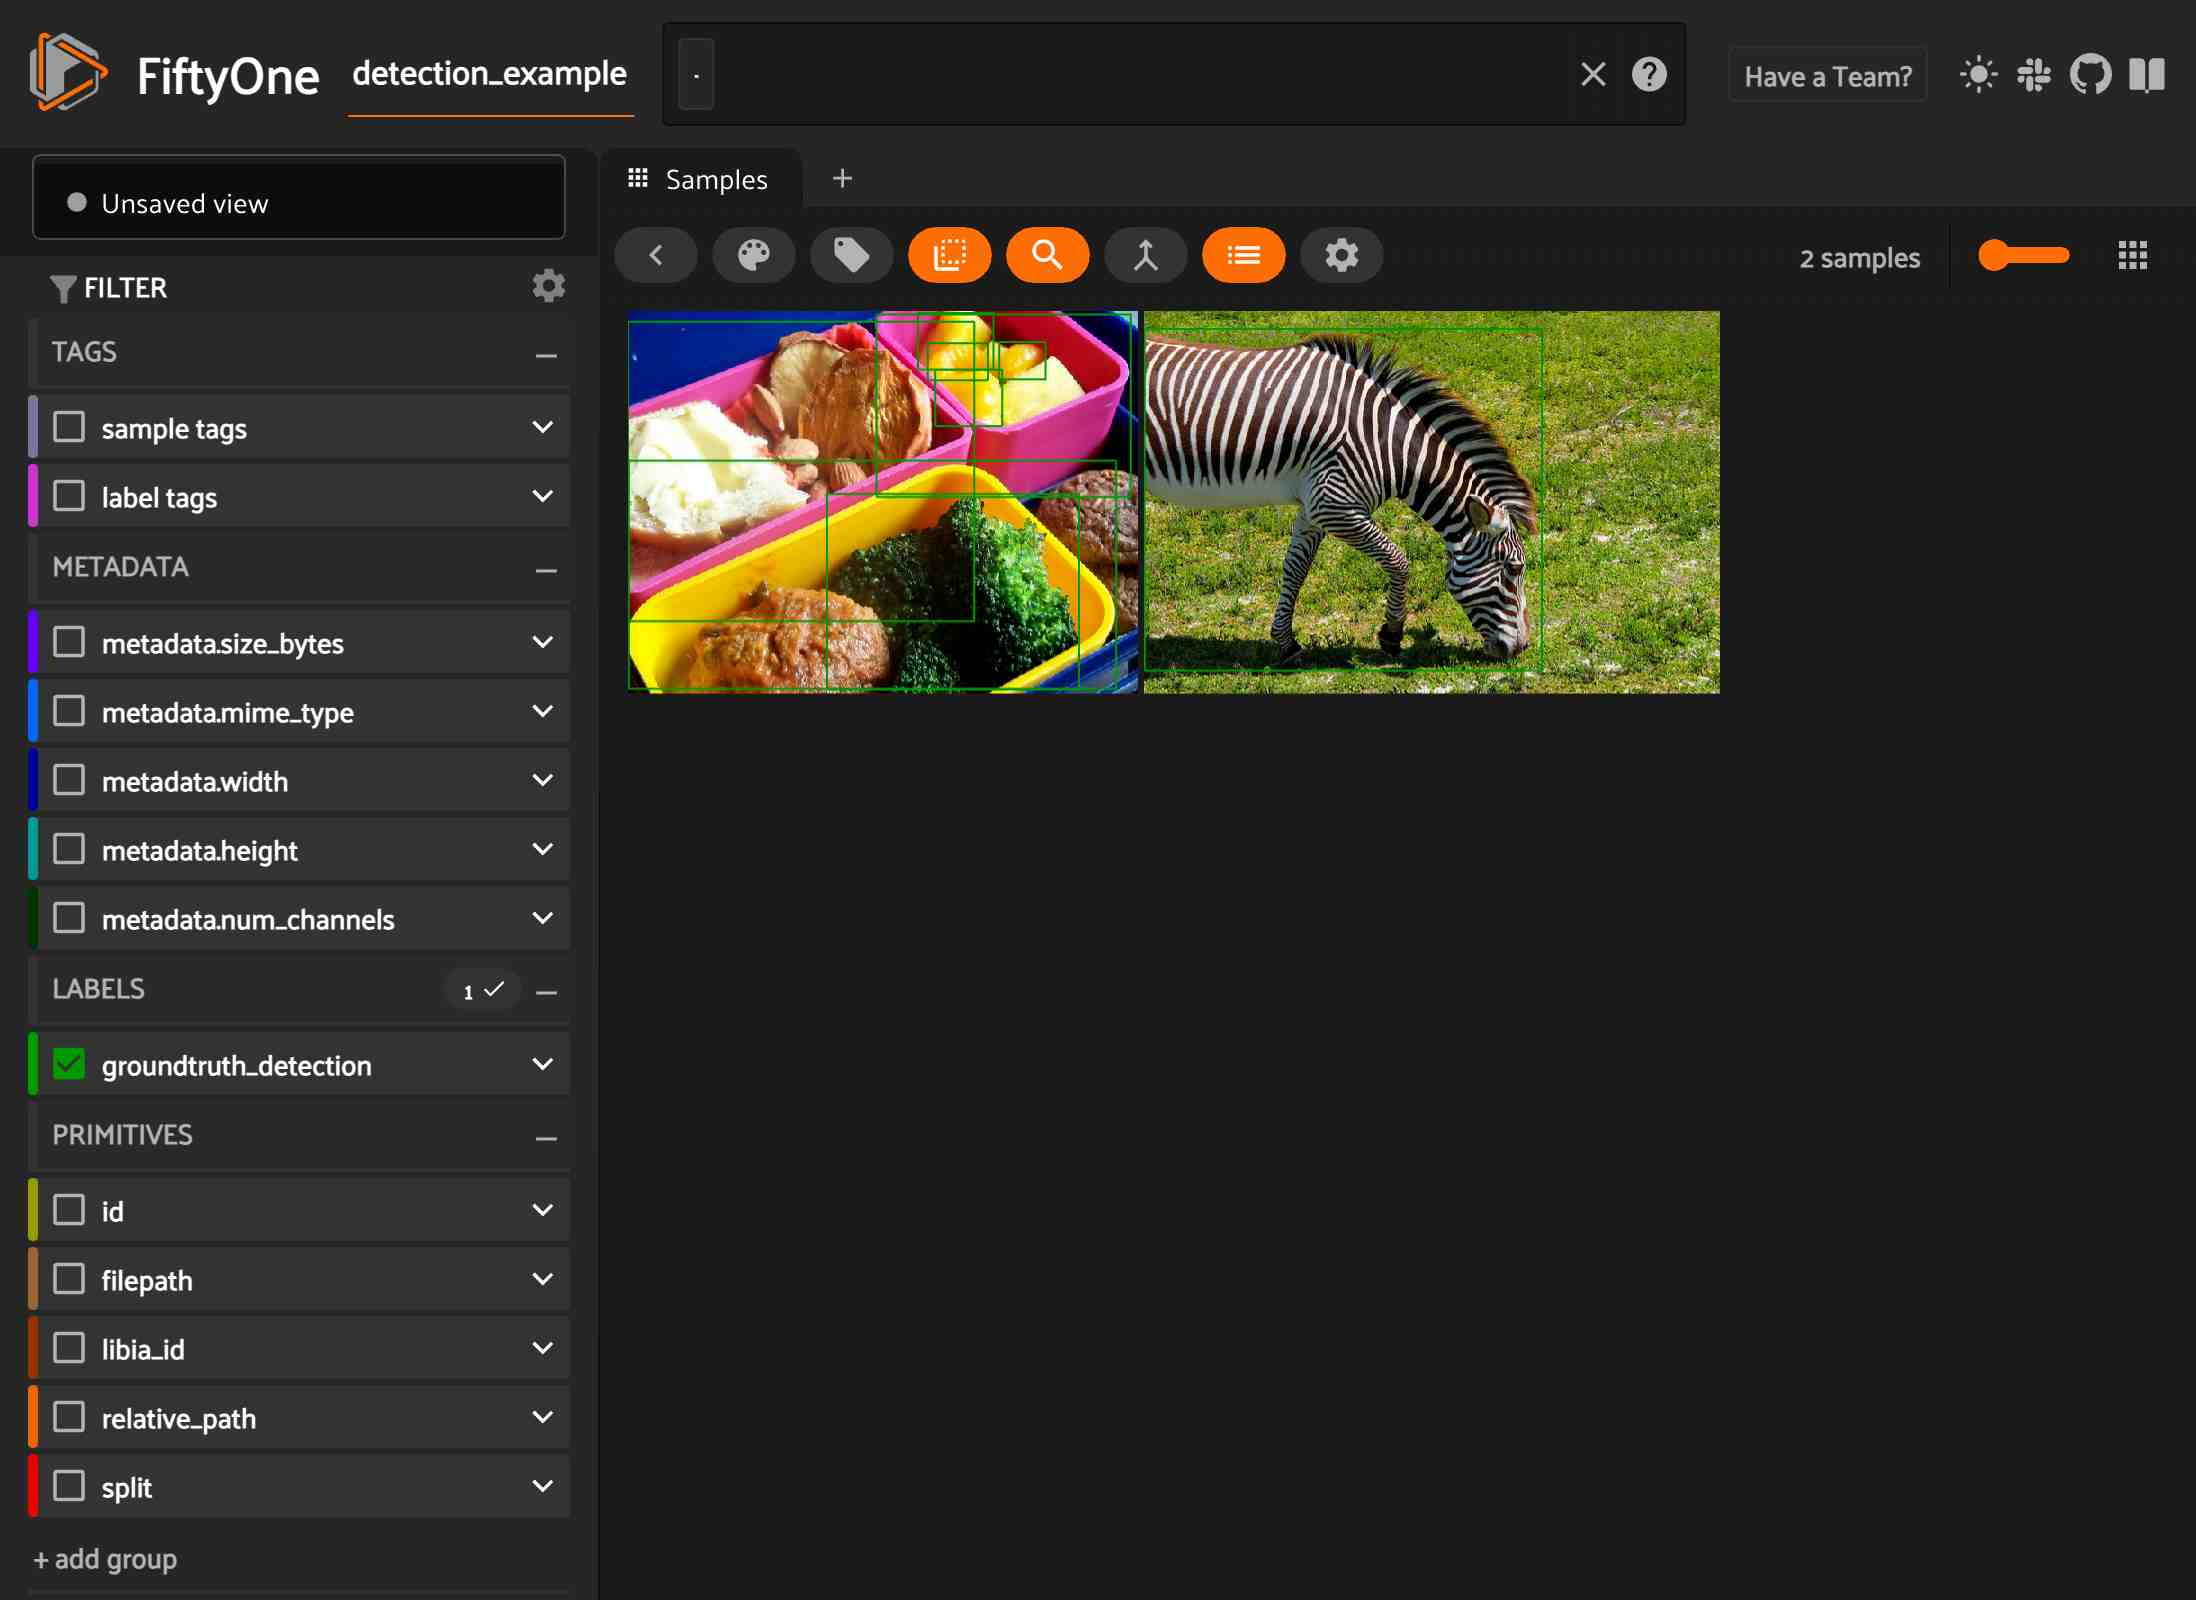

In [14]:
session = fo.launch_app(dataset)

In [15]:
# This cell is here to close all app and render them as pictures for nbsphinx.
session.freeze()

If you are using a remote notebook, you can either follow [this tutorial](https://docs.voxel51.com/environments/index.html#remote-notebooks) or launch the app with an address set to `0.0.0.0` (which means it accepts all connections)
And then go to your remote machine's ip from another tab
For example, if you remote machine ip is `192.168.40.40`, you will need to visit
the address `192.168.40.40:5151` where `5151` is the configured port (see below)
Uncomment the next cell to test this config

In [16]:
# fo.launch_app(dataset, auto=False, address="0.0.0.0", port="5151")

## Load a key point dataset in fiftyone

The key point dataset is similar to bounding box dataset, except it only uses keypoints (with coordinate XY). Fiftyone can deal with it as well.

Libia will try to convert all key point annotations (i.e. bounding boxes with width and height of 0) to [keypoint fiftyone](https://docs.voxel51.com/api/fiftyone.core.labels.html#fiftyone.core.labels.Keypoints) objects with only one keypoint instead of [Detections](https://docs.voxel51.com/api/fiftyone.core.labels.html#fiftyone.core.labels.Detections) with the option `allow_keypoints`

In [17]:
COCO_kp_dataset = from_coco_keypoints(
    "../../test_libia/test_data/coco_dataset/annotations_keypoints.json",
    images_root="../../test_libia/test_data/coco_dataset/data/Images/",
    category_name="object",
)
COCO_kp_dataset.check(allow_keypoints=True)

Checking Image and annotations Ids ...
Checking Bounding boxes ..
Checking label map ...
Checking images are valid ...


  0%|          | 0/2 [00:00<?, ?it/s]

In [18]:
kp_dataset = COCO_kp_dataset.to_fiftyone(
    dataset_name="dataset_keypoints", allow_keypoints=True, existing="erase"
)

  0%|          | 0/2 [00:00<?, ?it/s]

 100% |█████████████████████| 2/2 [36.3ms elapsed, 0s remaining, 55.1 samples/s]     



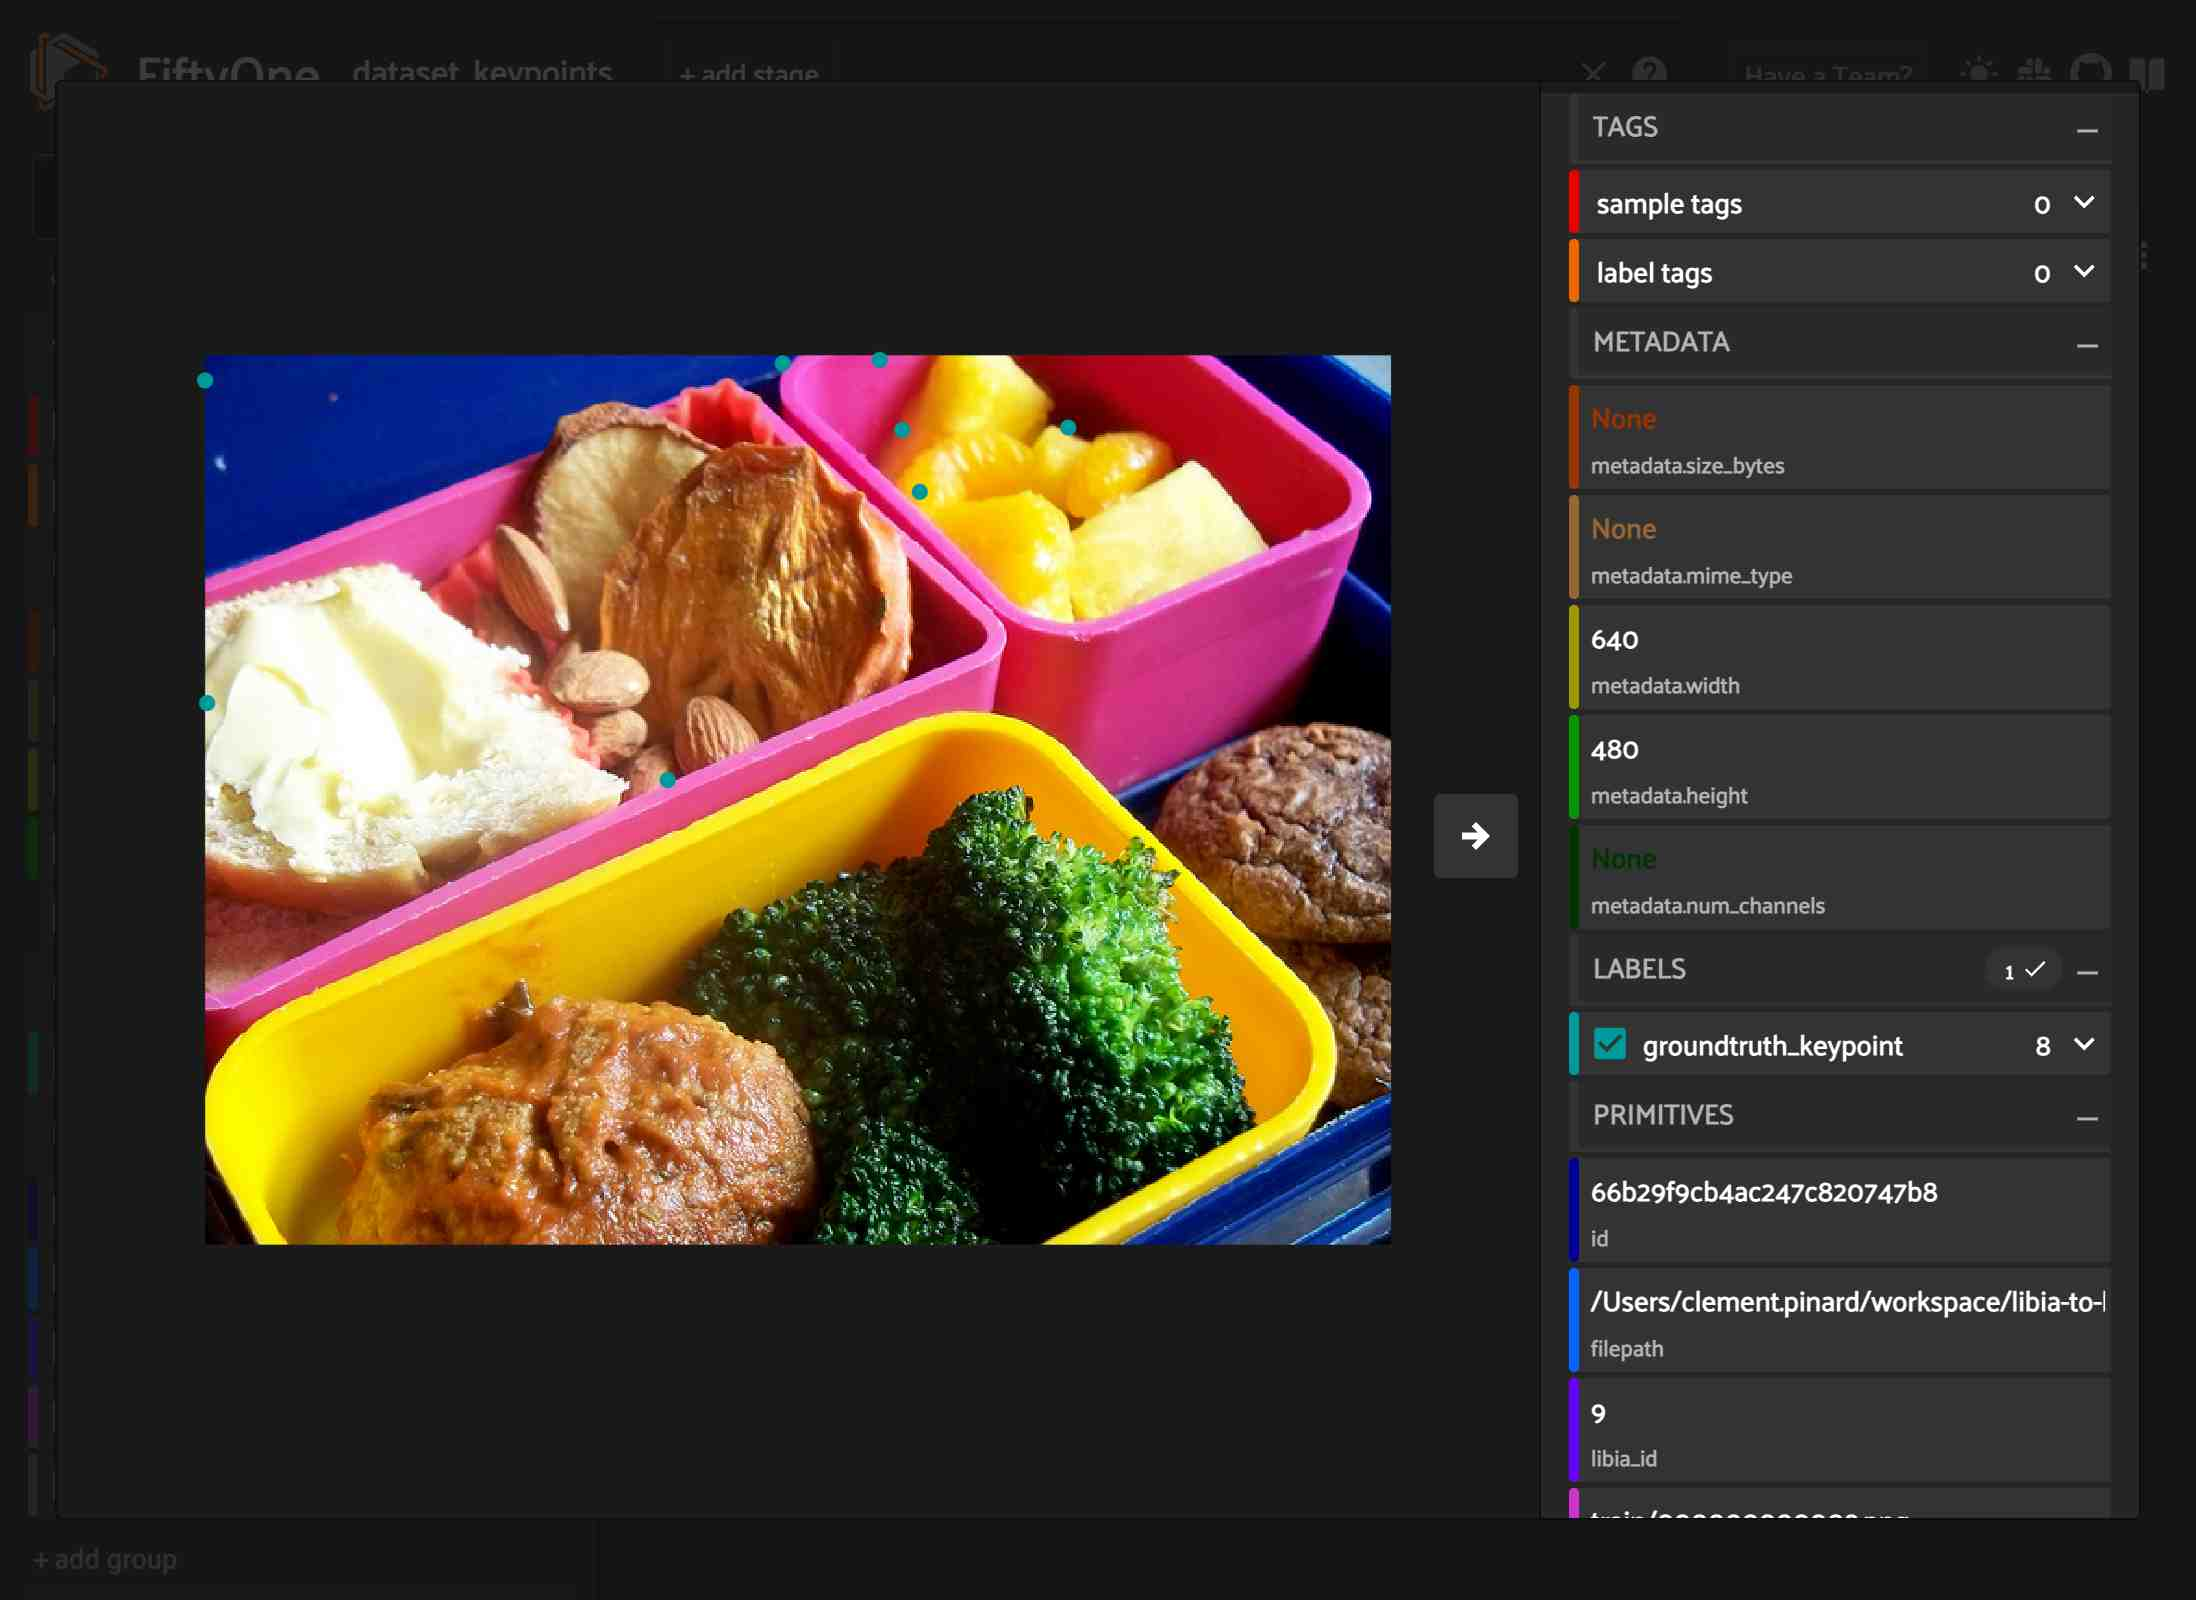

In [19]:
session = fo.launch_app(kp_dataset)

In [20]:
# This cell is here to close all app and render them as pictures for nbsphinx.
session.freeze()

## Hybrid dataset

Libia is also compatible with hybrid datasets, with both detection bounding boxes and keypoints

Here we create a dataset with some key point bounding boxes and some regular and we show it in fiftyone

In [21]:
hybrid_annotations = COCO_dataset.annotations.copy()
i = hybrid_annotations.index
hybrid_annotations.loc[i[:4], "box_x_min"] += (
    hybrid_annotations.loc[i[:4], "box_width"] / 2
)
hybrid_annotations.loc[i[:4], "box_y_min"] += (
    hybrid_annotations.loc[i[:4], "box_height"] / 2
)
hybrid_annotations.loc[i[:4], "box_width"] = 0
hybrid_annotations.loc[i[:4], "box_height"] = 0

hybrid_COCO = Dataset(
    COCO_dataset.images_root,
    COCO_dataset.images,
    hybrid_annotations,
    COCO_dataset.label_map,
)

In [22]:
hybrid_COCO

In [23]:
hybrid_dataset = hybrid_COCO.to_fiftyone(
    "hybrid", allow_keypoints=True, existing="erase"
)

  0%|          | 0/2 [00:00<?, ?it/s]

 100% |█████████████████████| 2/2 [44.5ms elapsed, 0s remaining, 44.9 samples/s]     



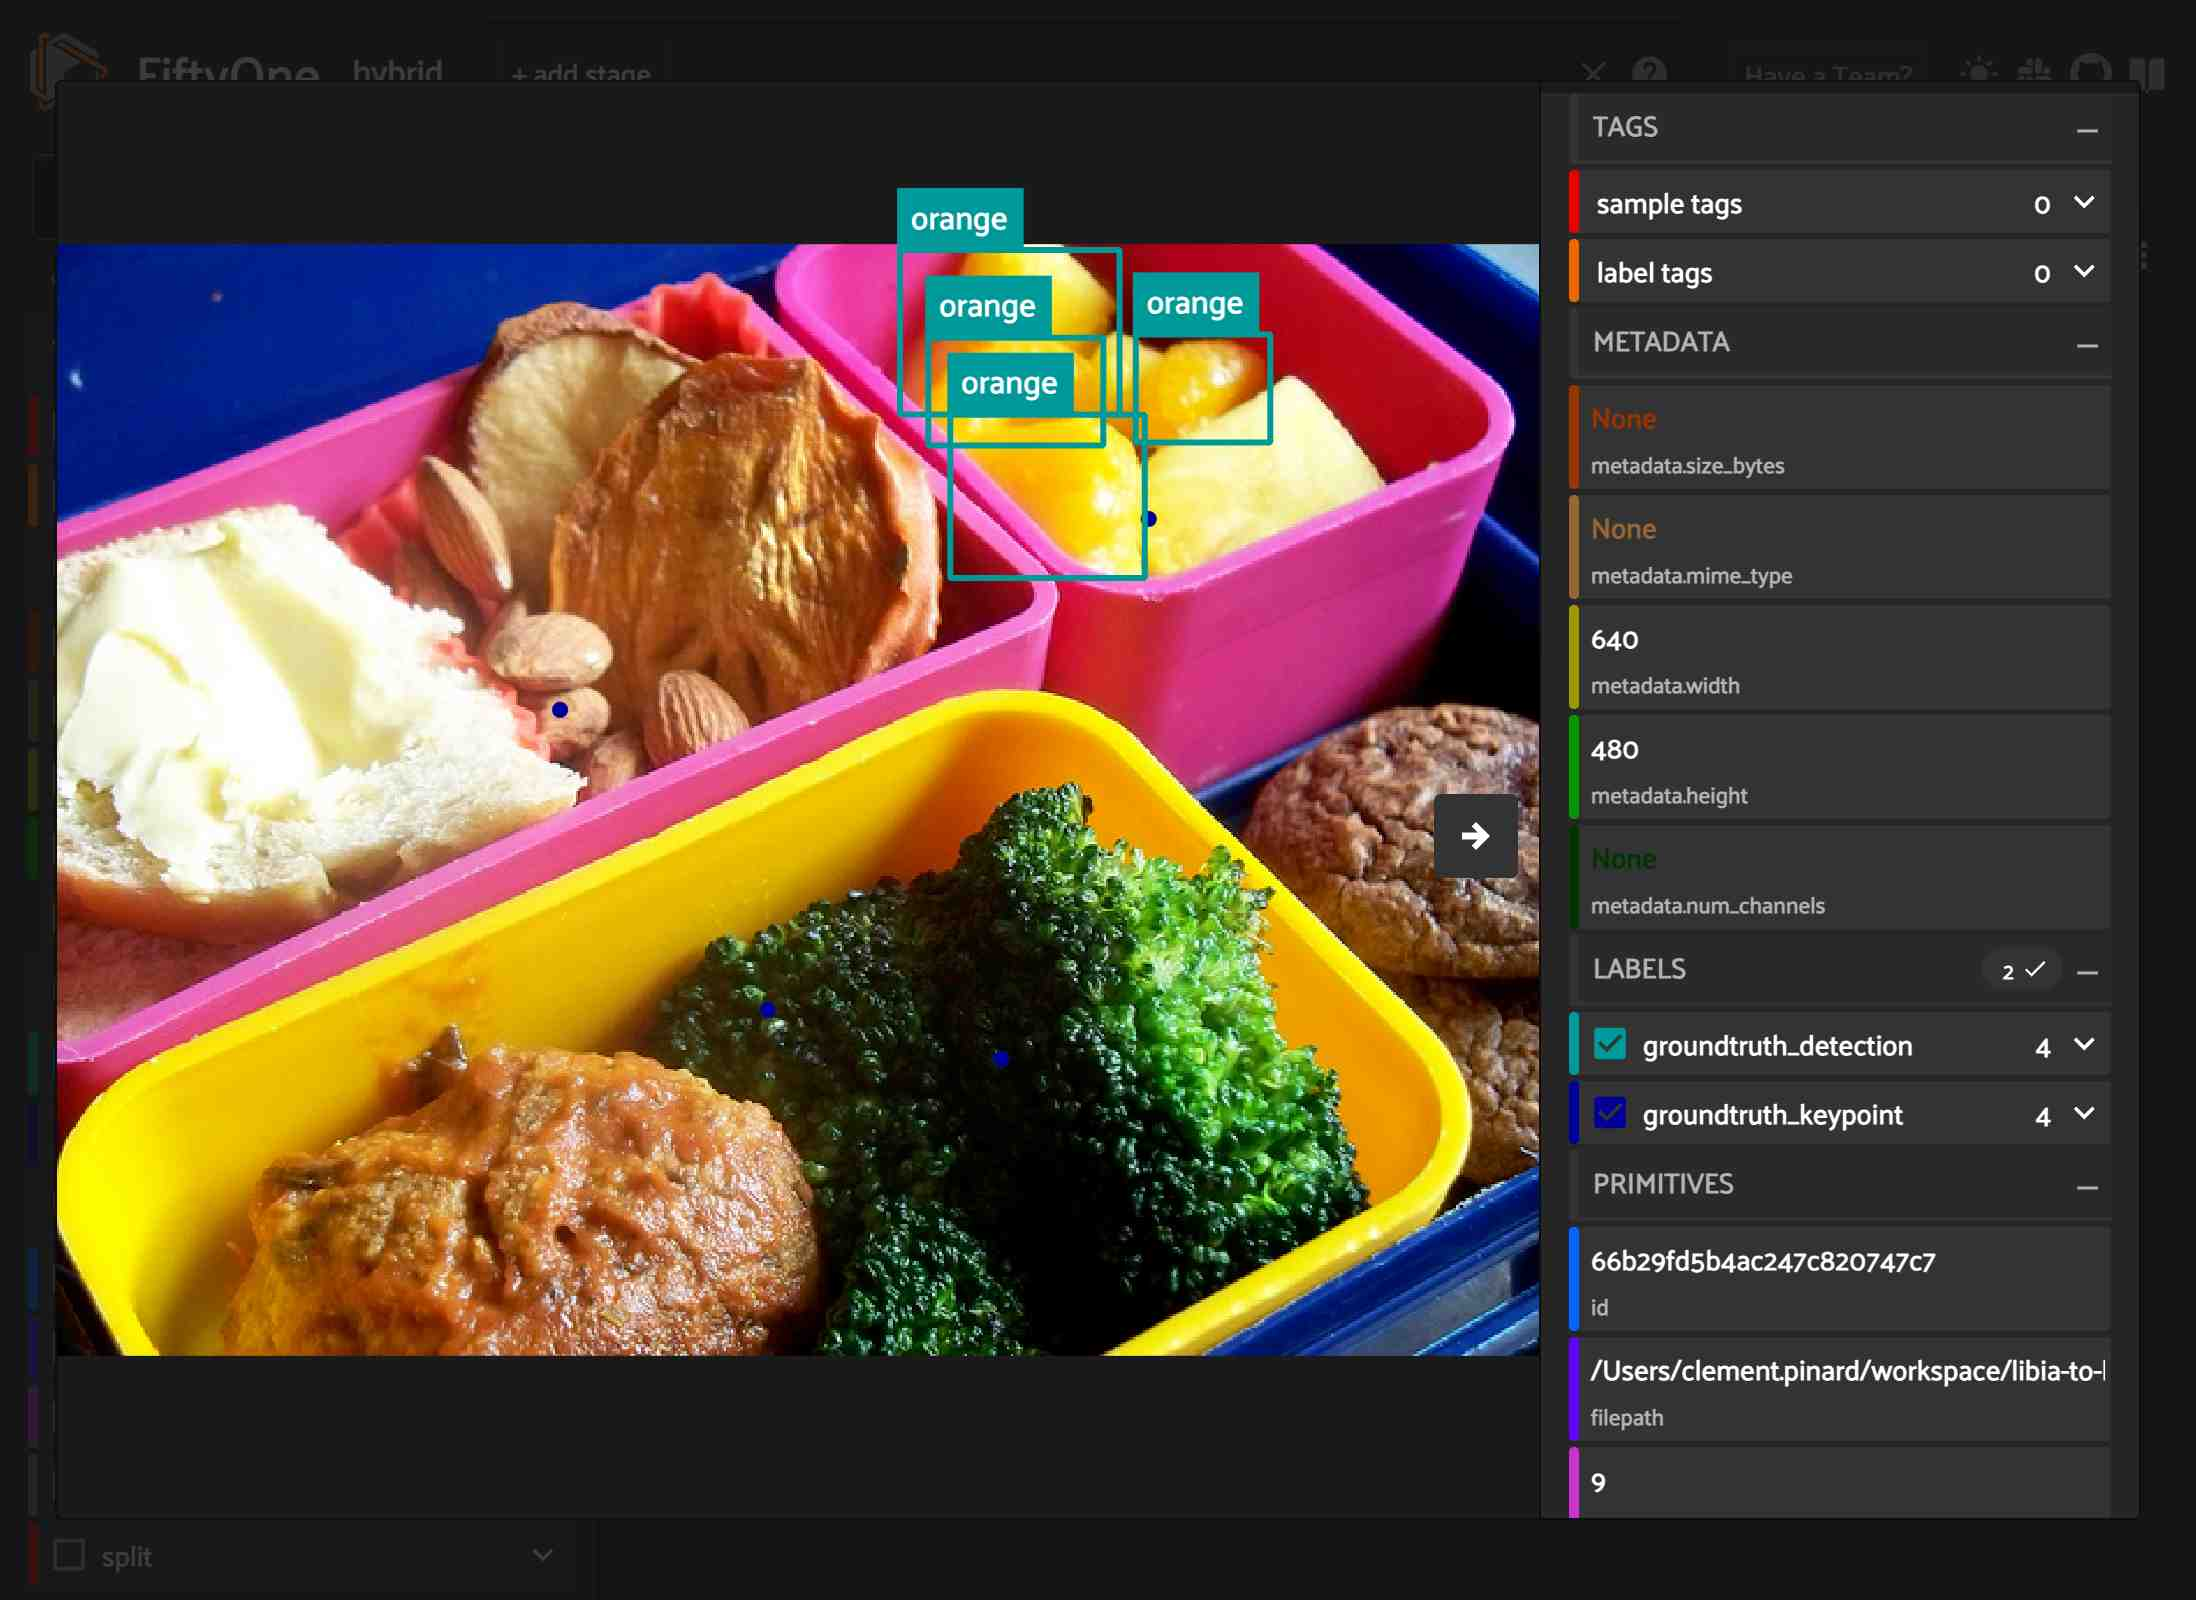

In [24]:
session = fo.launch_app(hybrid_dataset)

In [25]:
# This cell is here to close all app and render them as pictures for nbsphinx.
session.freeze()

## Load multiple annotations sets to the same fiftyone dataset

You can easily compare two sets of annotations with fiftyone. This is very useful for inspecting predictions with respect to the ground truth or other predictions

In this example, we construct a fictive dataset with fair predictions based on COCO_dataset.

In [26]:
import numpy as np

COCO_dataset_predictions = COCO_dataset.empty_annotations()
with COCO_dataset_predictions.annotation_append() as appender:
    appender.append(
        image_id=9,
        category_id=51,
        bbox_coordinates=np.array(
            [[0, 200, 600, 300], [300, 0, 300, 250], [0, 0, 400, 400]]
        ),
    )
    appender.append(
        image_id=34, category_id=24, bbox_coordinates=np.array([[0, 20, 450, 400]])
    )

In [27]:
COCO_dataset_predictions

### Using multiple libia dataset objects

The first option to compare two datasets in fiftyone is to call the `to_fiftyone` method with the same dataset name as the first dataset, but with a different `annotations_name`

In [28]:
COCO_dataset_predictions.to_fiftyone(
    dataset_name="detection_example", annotations_name="predictions", existing="update"
)

  0%|          | 0/2 [00:00<?, ?it/s]

 100% |█████████████████████| 2/2 [31.6ms elapsed, 0s remaining, 63.3 samples/s]     


Name:        detection_example
Media type:  image
Num samples: 2
Persistent:  False
Tags:        []
Sample fields:
    id:                    fiftyone.core.fields.ObjectIdField
    filepath:              fiftyone.core.fields.StringField
    tags:                  fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:              fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    libia_id:              fiftyone.core.fields.IntField
    relative_path:         fiftyone.core.fields.StringField
    split:                 fiftyone.core.fields.StringField
    groundtruth_detection: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions_detection: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


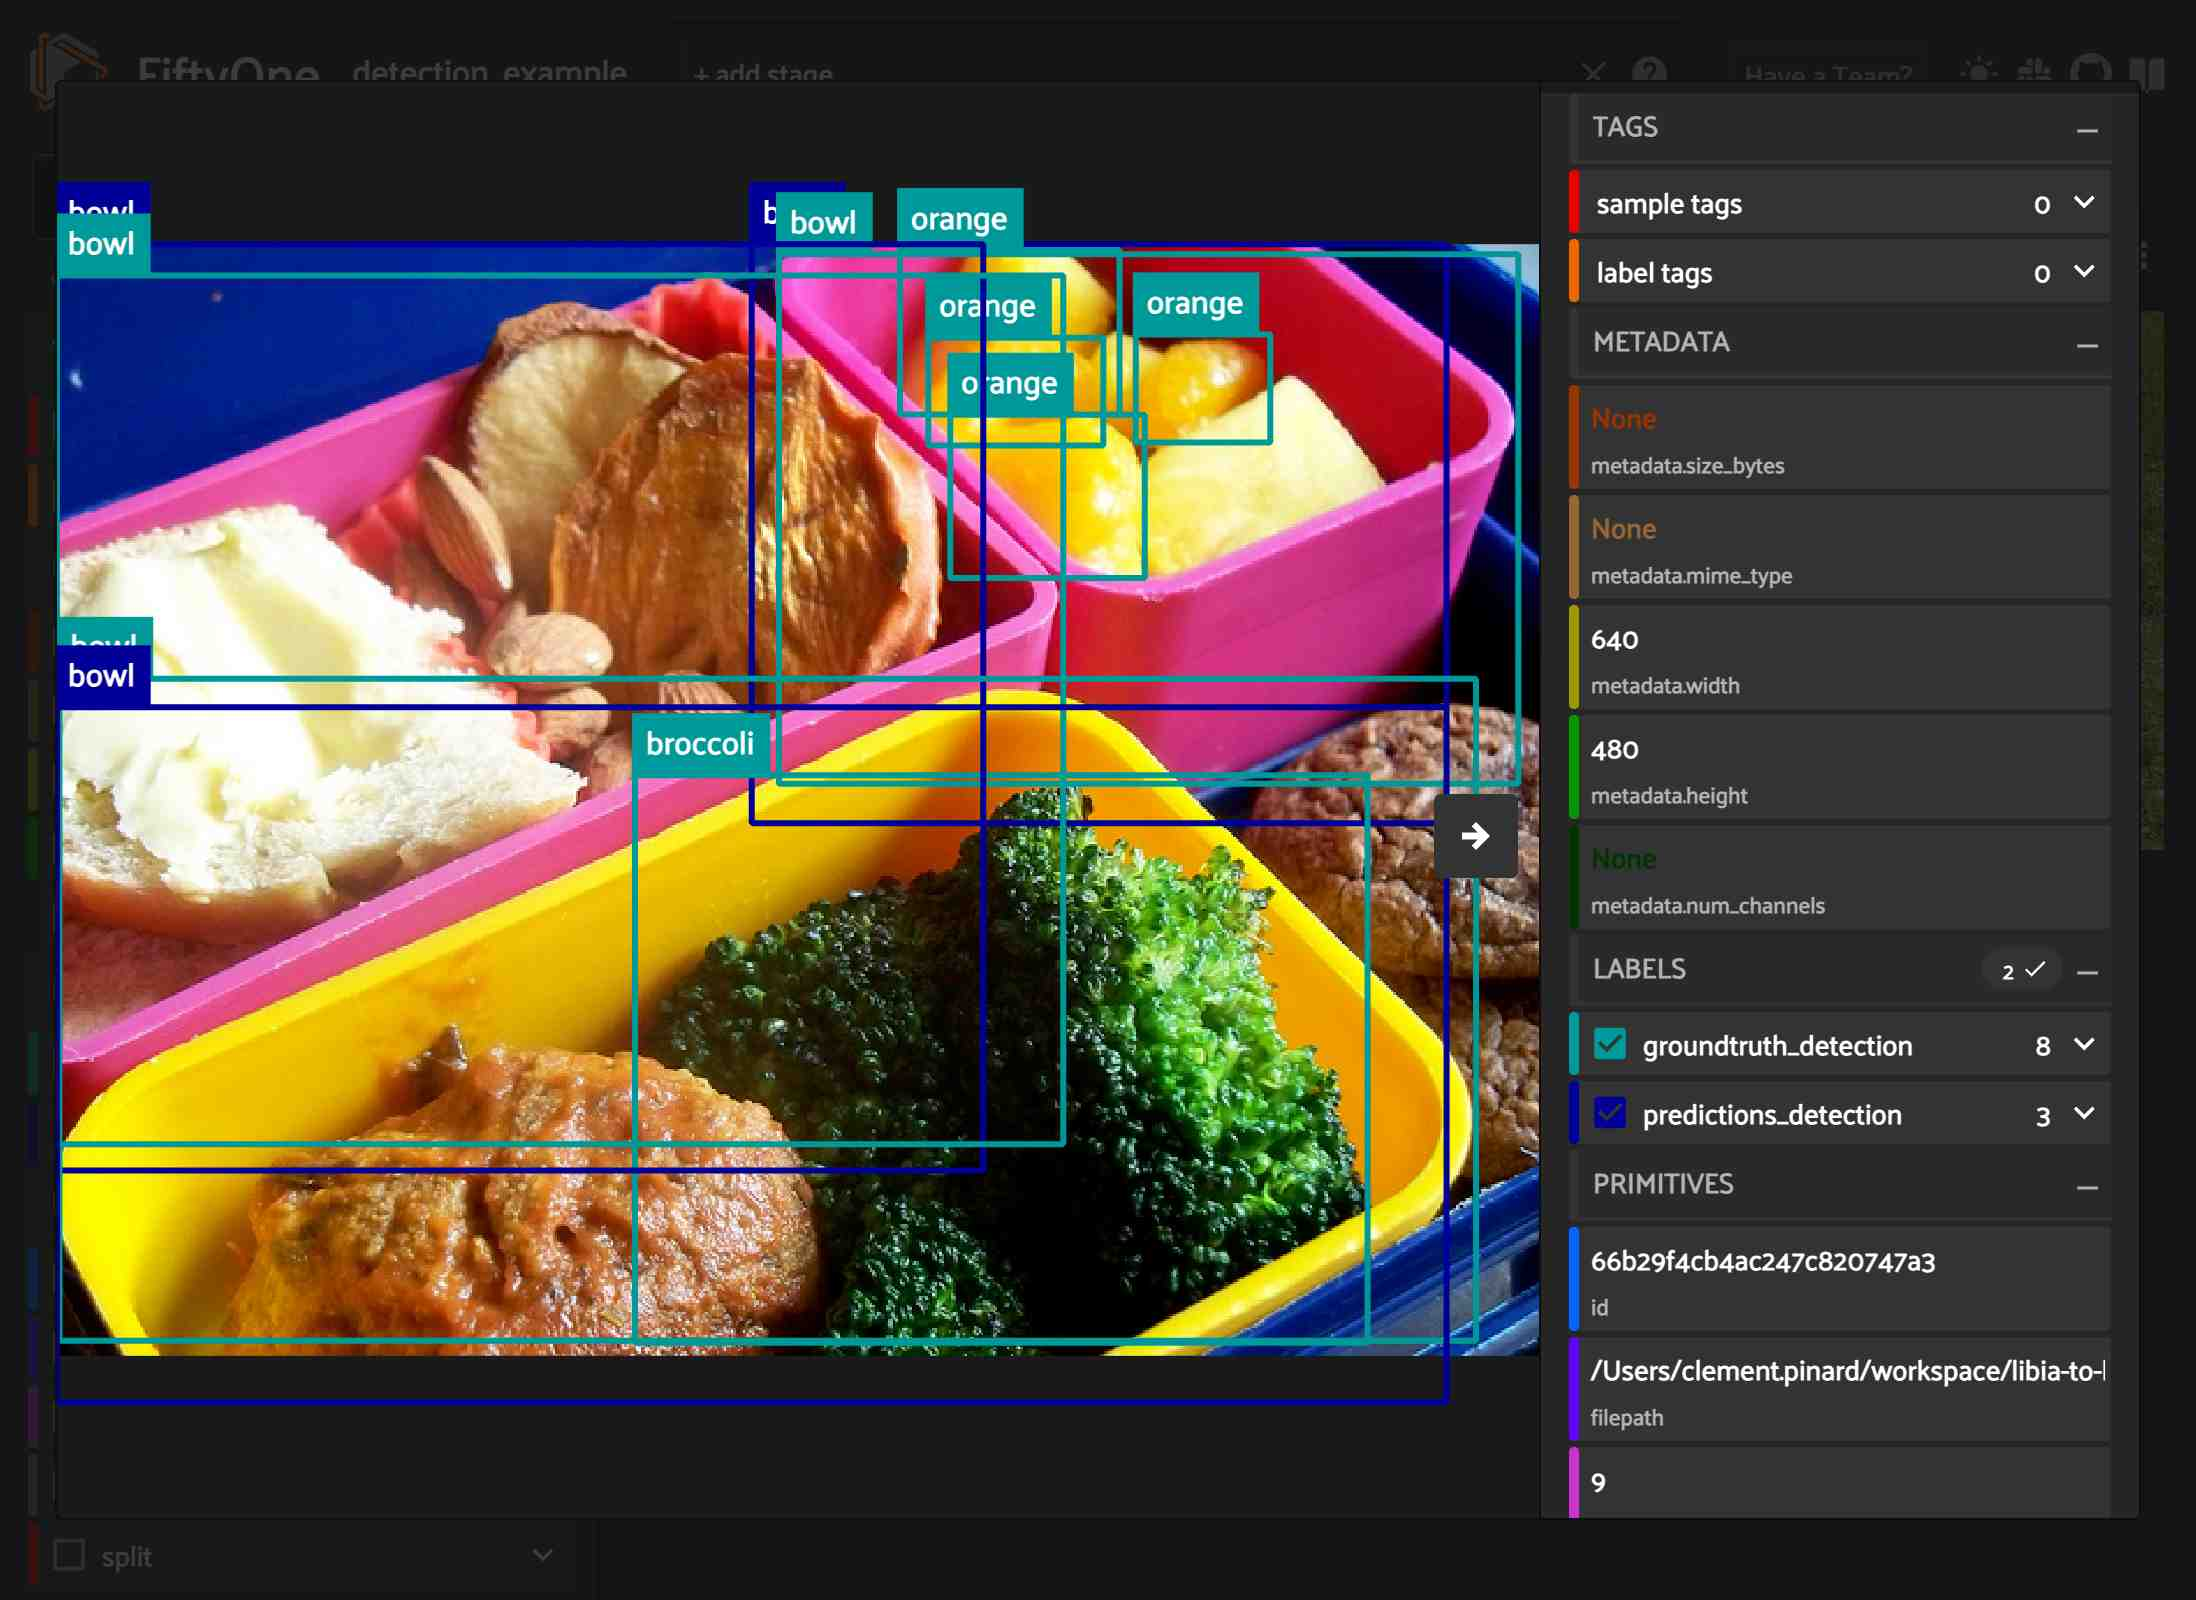

In [29]:
session = fo.launch_app(dataset)

In [30]:
# This cell is here to close all app and render them as pictures for nbsphinx.
session.freeze()

### Using Evaluator object

The second option is to let libia handle both dataset at the same time with a `Evaluator` object. See [related python](3_demo_evaluation_detection.ipynb) notebook for Evaluation. Note that the evaluator method only works if the predictions dataset has a `confidence` column.

In [31]:
from libia.evaluation import DetectionEvaluator as de

COCO_dataset_predictions.annotations["confidence"] = 1
evaluator = de(groundtruth=COCO_dataset, predictions=COCO_dataset_predictions)

display(evaluator)

In [33]:
comparator = evaluator.to_fiftyone(existing="erase")

  0%|          | 0/2 [00:00<?, ?it/s]

 100% |█████████████████████| 2/2 [35.8ms elapsed, 0s remaining, 55.8 samples/s]     



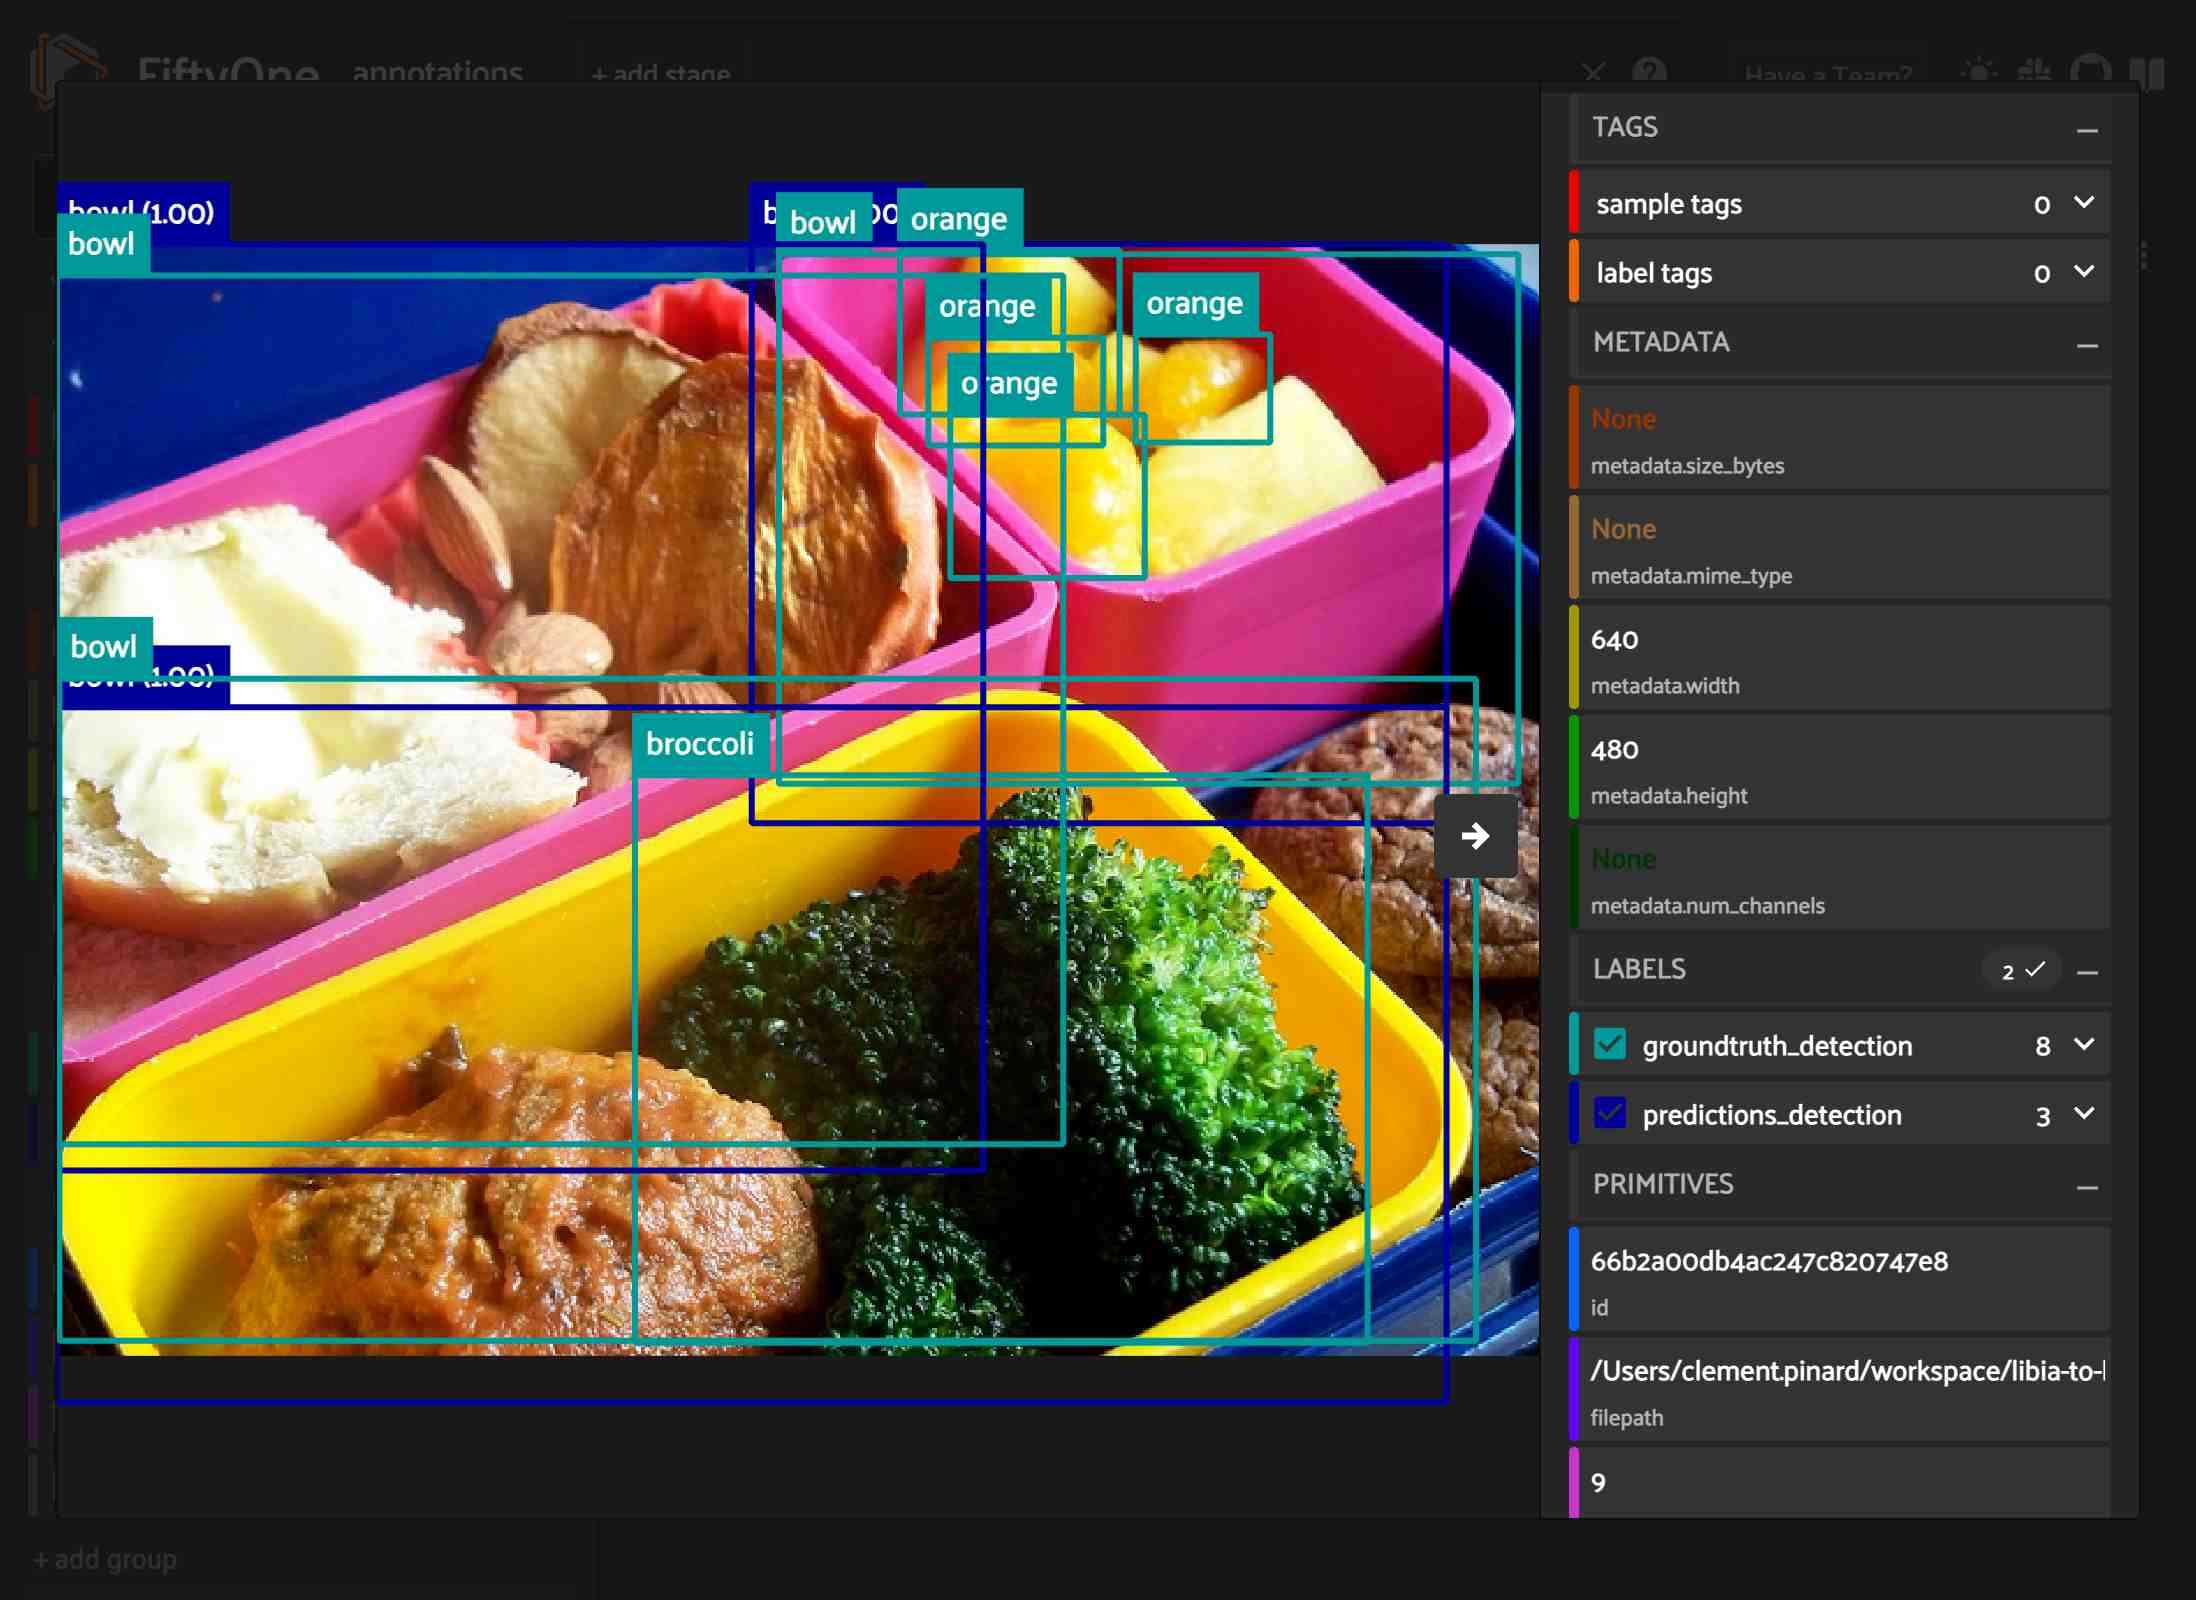

In [34]:
session = fo.launch_app(comparator)

In [35]:
# This cell is here to close all app and render them as pictures for nbsphinx.
session.freeze()
fo.close_app()